In [1]:
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv('D:\projects\Codrelate\Codrelate 2025 Problem Statement\AI-Powered Content Analysis and Recommendation.csv')
print('shape of the dataset:', df.shape)


shape of the dataset: (192368, 6)


Now, the data cleaning takes place


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Handle missing values
print('missing values in the dataset:')
print( df.isnull().sum())

# Fill missing values with appropriate defaults
df['title'].fillna('Unknown', inplace=True) # Use 'Unknown' for missing titles
df['text'].fillna('Unknown', inplace=True) # Use 'Unknown' for missing text
df['url'].fillna('No URL', inplace=True) # Use 'No URL' for missing URLs
df['authors'].fillna('[]', inplace=True)  # Empty list for no authors
df['tags'].fillna('[]', inplace=True)     # Empty list for no tags
df['timestamp'].fillna('Unknown', inplace=True)  # Use 'Unknown' for missing timestamps

missing values in the dataset:
title        5
text         0
url          0
authors      0
timestamp    2
tags         0
dtype: int64


In [3]:
import ast

# Parse authors and tags as lists using ast.literal_eval
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.strip() else [])
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.strip() else [])

In [4]:
# Standardize timestamps to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f%z', errors='coerce')

# Remove duplicates based on URL or title + timestamp
df.drop_duplicates(subset=['url'], inplace=True)
df.drop_duplicates(subset=['title', 'timestamp'], inplace=True)

In [ ]:
import re

# Clean text: remove special characters, extra whitespace
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)) if pd.notnull(x) else '')
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

# Remove special characters from titles
df['title'] = df['title'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)) if pd.notnull(x) else '')
df['title'] = df['title'].apply(lambda x: ' '.join(x.split()))

# Cleaning process completed

In [ ]:
# Outlier analysis and handling
df['text_length'] = df['text'].str.len()  # Calculate text length for outlier detection
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier Analysis for 'text_length':")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Identify and handle outliers (e.g., cap them or remove)
outliers = df[(df['text_length'] < lower_bound) | (df['text_length'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
# Option to cap outliers instead of removing (replace with bounds)
df['text_length'] = df['text_length'].clip(lower=lower_bound, upper=upper_bound)
print("Outliers capped to IQR bounds.")


From here, the data of the datasets are explored.


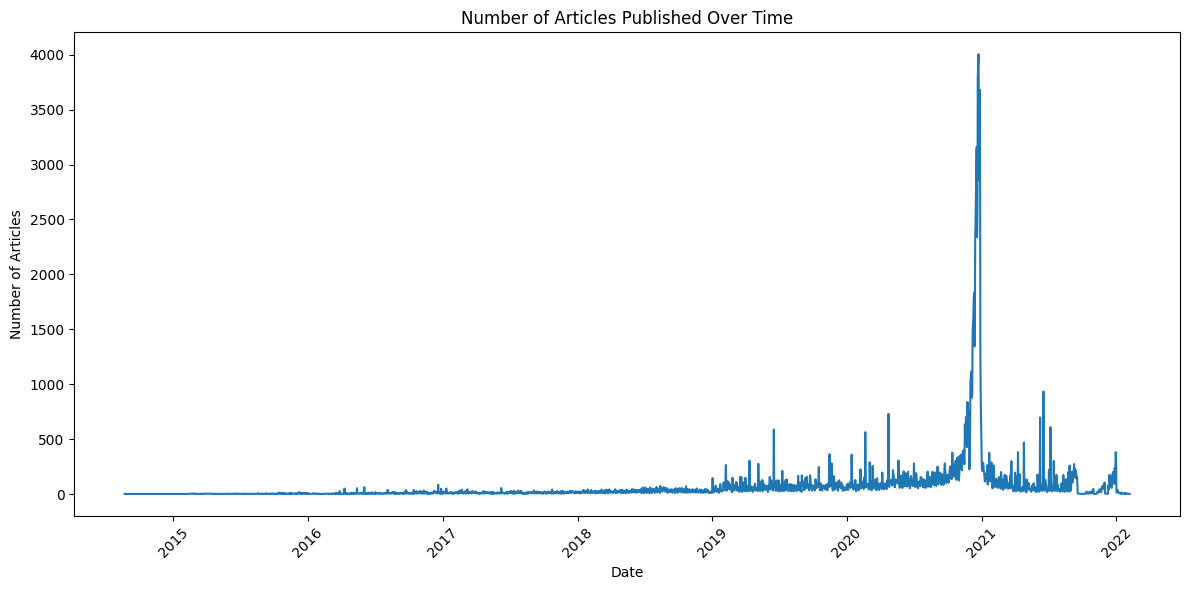

In [6]:
import matplotlib.pyplot as plt

# Temporal Analysis
plt.figure(figsize=(12, 6))
df['timestamp'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above graph, it is evident that htere is an increase of articles published at the end of 2020 to start of 2021 

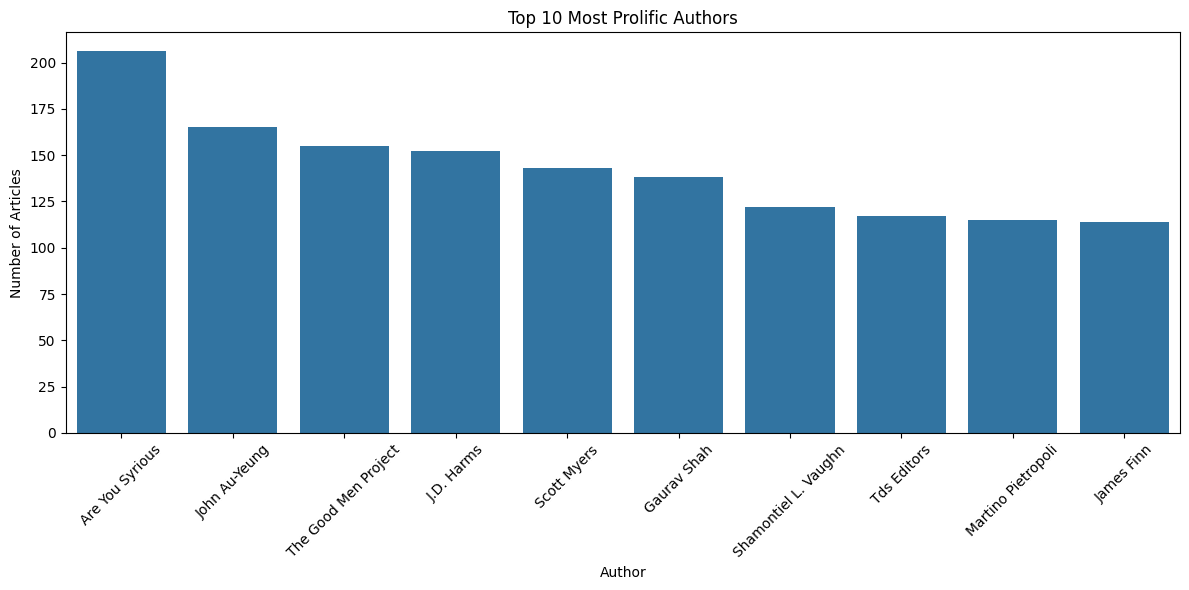

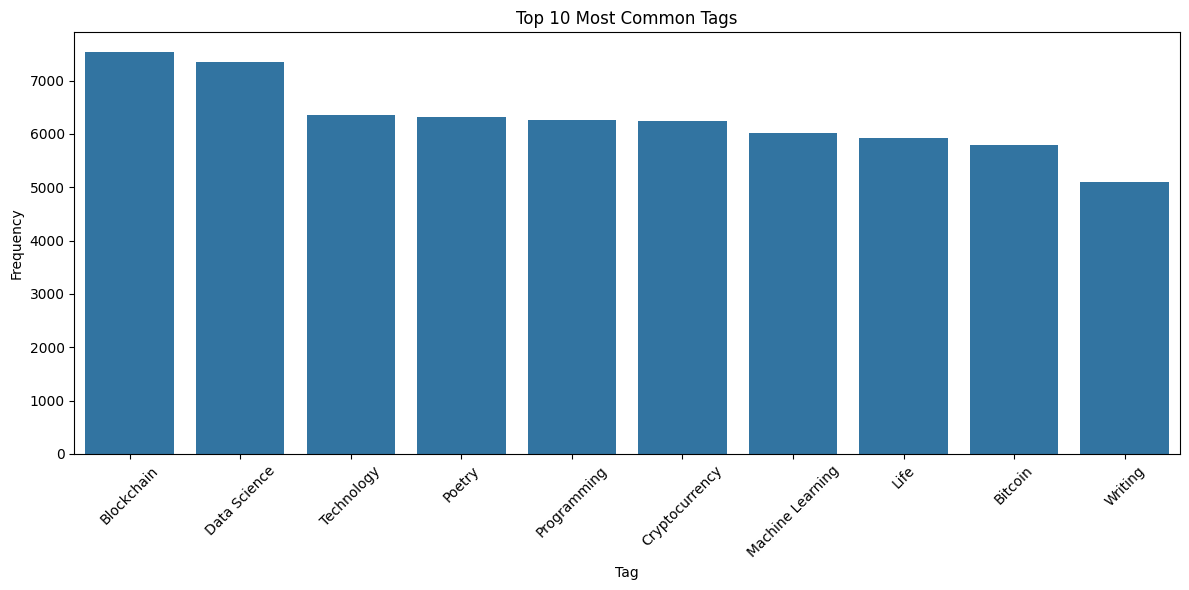

In [ ]:
from collections import Counter
import seaborn as sns

# Top 10 Authors and Tags
all_authors = [author for sublist in df['authors'] for author in sublist if sublist]  # Flatten list
all_tags = [tag for sublist in df['tags'] for tag in sublist if sublist]

plt.figure(figsize=(12, 6))
sns.barplot(x=list(dict(Counter(all_authors).most_common(10)).keys()), 
                y=list(dict(Counter(all_authors).most_common(10)).values()))
plt.title('Top 10 Most Prolific Authors')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=list(dict(Counter(all_tags).most_common(10)).keys()), 
                y=list(dict(Counter(all_tags).most_common(10)).values()))
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

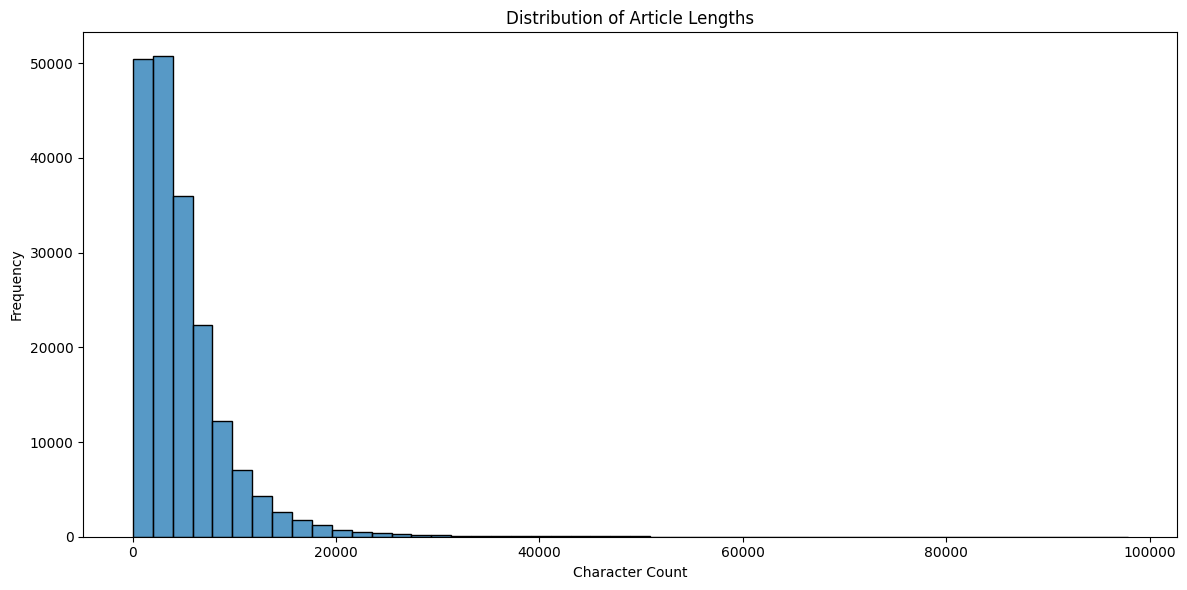

In [12]:
df['text_length'] = df['text'].str.len()
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Article Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

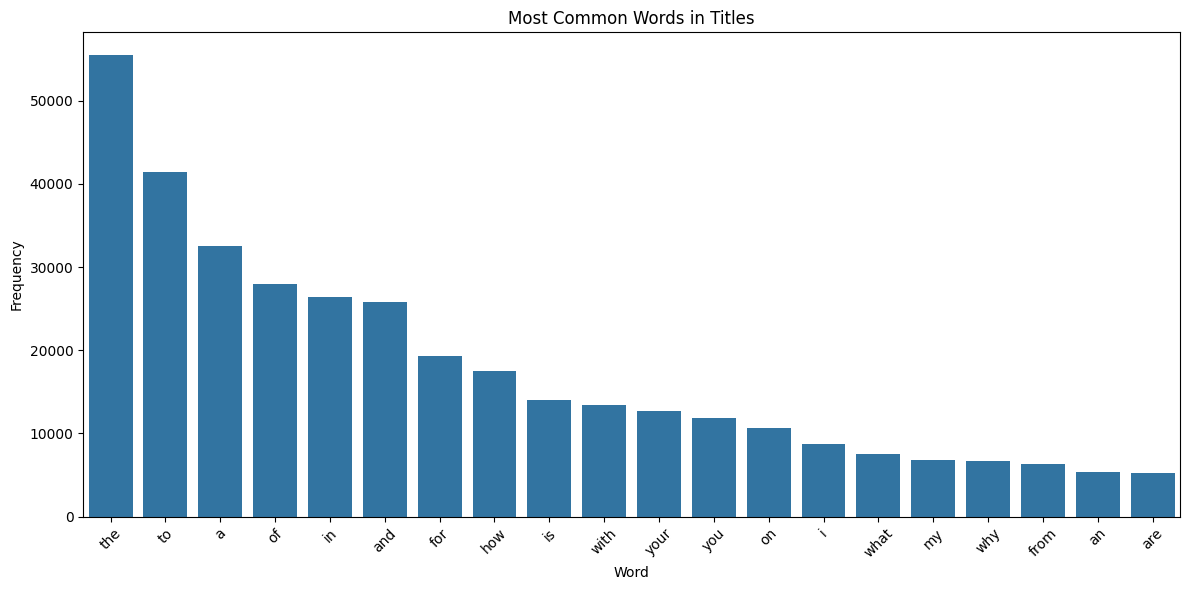

In [ ]:
from nltk.tokenize import word_tokenize

# Keyword Extraction from Titles
all_titles = ' '.join(df['title'].dropna())
words = word_tokenize(all_titles.lower())
common_words = Counter(words).most_common(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, _ in common_words], y=[count for _, count in common_words])
plt.title('Most Common Words in Titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

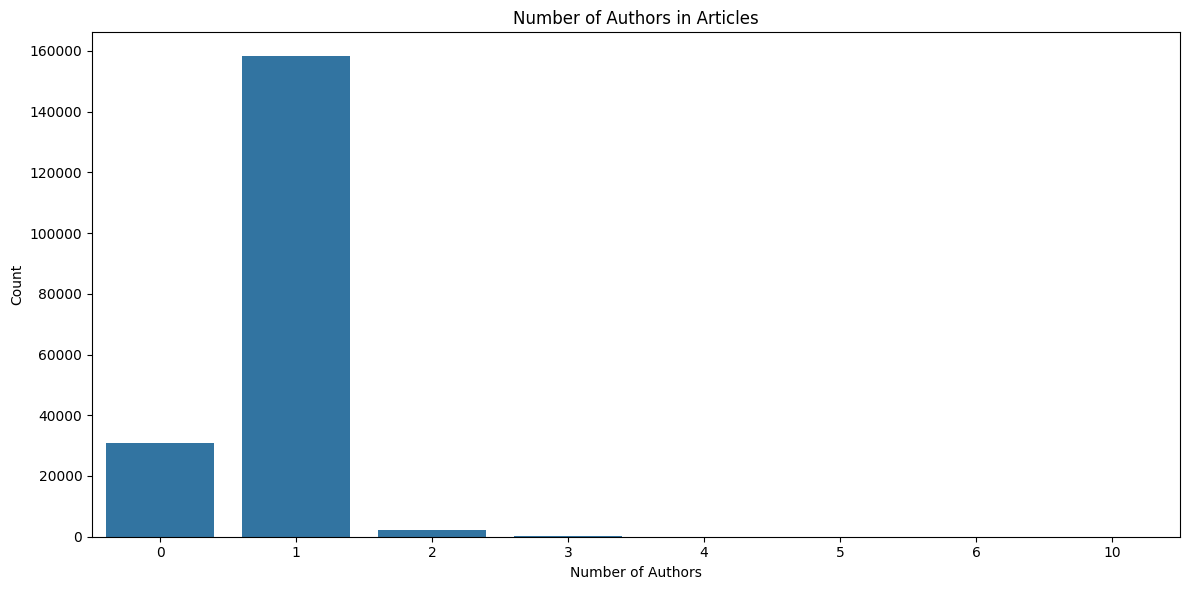

In [20]:
# Number of Authors in Articles Plot
df['num_authors'] = df['authors'].apply(lambda x: len(x) if x else 0)
plt.figure(figsize=(12, 6))
sns.countplot(x=df['num_authors'])
plt.title('Number of Authors in Articles')
plt.xlabel('Number of Authors')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [18]:
print("\nFinal Dataset Preview:")
print(df.head())


Final Dataset Preview:
                              title  \
0                Mental Note Vol 24   
1         Your Brain On Coronavirus   
2                    Mind Your Nose   
3          The 4 Purposes of Dreams   
4  Surviving a Rod Through the Head   

                                                text  \
0  Photo by Josh Riemer on Unsplash Merry Christm...   
1  Your Brain On Coronavirus A guide to the curio...   
2  Mind Your Nose How smell training can change y...   
3  Passionate about the synergy between science a...   
4  Youve heard of him havent you Phineas Gage The...   

                                                 url               authors  \
0  https://medium.com/invisible-illness/mental-no...            [Ryan Fan]   
1  https://medium.com/age-of-awareness/how-the-pa...       [Simon Spichak]   
2  https://medium.com/neodotlife/mind-your-nose-f...                    []   
3  https://medium.com/science-for-real/the-4-purp...  [Eshan Samaranayake]   
4  https://med